<a href="https://colab.research.google.com/github/hiro106/kaggle_iowa-house-prices/blob/main/Comprehensive_data_exploration_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COMPREHENSIVE DATA EXPLORATION WITH PYTHON

Notice: Customized URL

https://www.kaggle.com/code/hiro106/comprehensive-data-exploration-with-python/edit

In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
#bring in the six packs
df_train = pd.read_csv('/drive/My Drive/Colab Notebooks/kaggle/competitions/iowa-house-prices/train.csv')

In [4]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

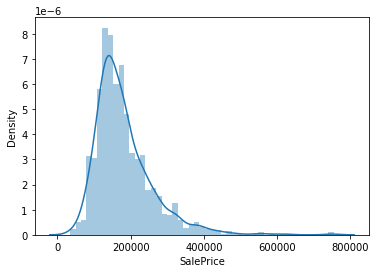

In [7]:
#histogram
sns.distplot(df_train['SalePrice'])

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("kurtosis: %f" % df_train['SalePrice'].kurt() )

Skewness: 1.882876
kurtosis: 6.536282


In [9]:
# scatter plot grlivarea/saleprice
var = 'GrLivArea'

In [10]:
var

'GrLivArea'

In [11]:
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [12]:
data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


In [13]:
# test the case of axis=0
data_test = pd.concat([df_train['SalePrice'], df_train[var]], axis=0)

In [14]:
data_test

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455      1647
1456      2073
1457      2340
1458      1078
1459      1256
Length: 2920, dtype: int64

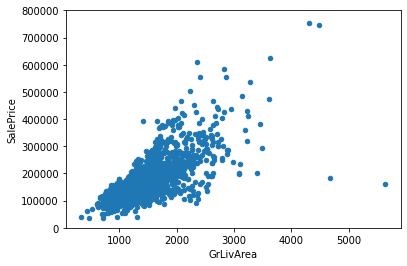

In [15]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [16]:
# scatter plot totalbsmst/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [17]:
data

,SalePrice,TotalBsmtSF
0,208500,856
1,181500,1262
2,223500,920
3,140000,756
4,250000,1145
...,...,...
1455,175000,953
1456,210000,1542
1457,266500,1152
1458,142125,1078


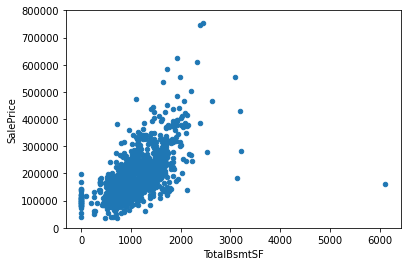

In [18]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [19]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [20]:
data

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


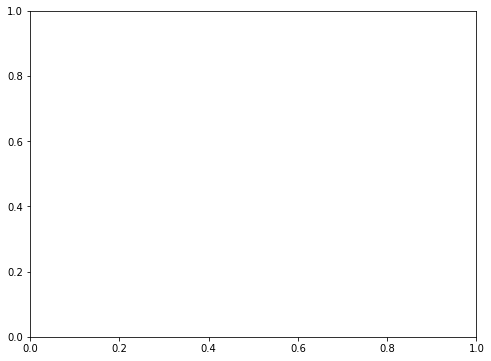

In [25]:
f, ax = plt.subplots(figsize=(8, 6))

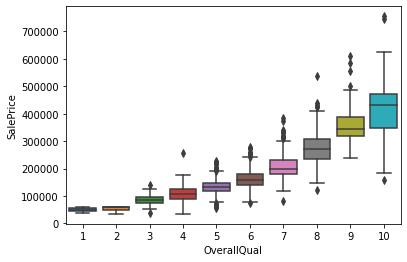

In [24]:
fig = sns.boxplot(data=data,x=var, y="SalePrice")

In [23]:
fig.axis(ymin=0, ymax=800000)

(-0.5, 9.5, 0.0, 800000.0)

(-0.5, 9.5, 0.0, 800000.0)

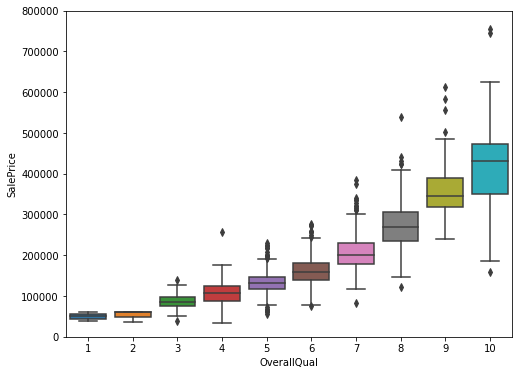

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=data,x=var, y="SalePrice")
fig.axis(ymin=0, ymax=800000)

In [27]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [28]:
data

,SalePrice,YearBuilt
0,208500,2003
1,181500,1976
2,223500,2001
3,140000,1915
4,250000,2000
...,...,...
1455,175000,1999
1456,210000,1978
1457,266500,1941
1458,142125,1950


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

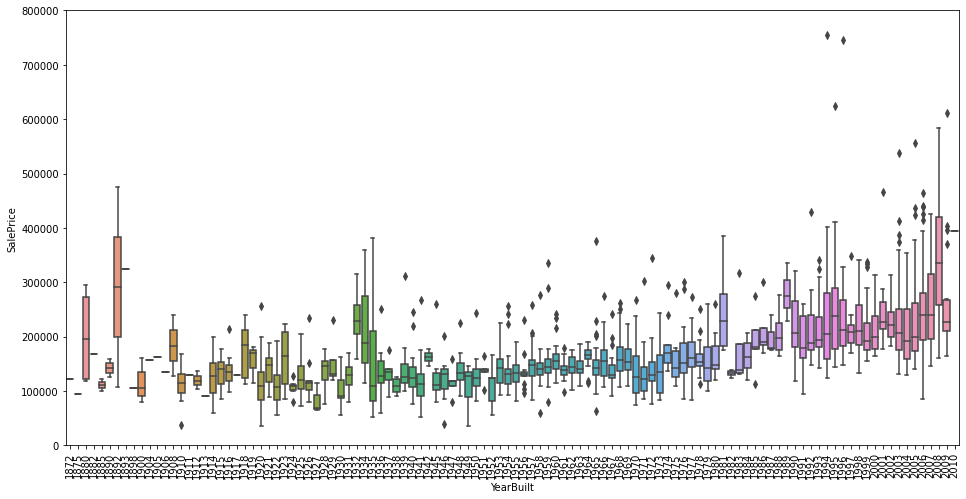

In [29]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(data=data,x=var, y="SalePrice")
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)